<h1>Text Classification using Logistic Regression<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression-Theory" data-toc-modified-id="Logistic-Regression-Theory-1">Logistic Regression Theory</a></span><ul class="toc-item"><li><span><a href="#Regression-Revision" data-toc-modified-id="Regression-Revision-1.1">Regression Revision</a></span></li><li><span><a href="#Linear-Classifiers" data-toc-modified-id="Linear-Classifiers-1.2">Linear Classifiers</a></span><ul class="toc-item"><li><span><a href="#Linear-Classifier-Example" data-toc-modified-id="Linear-Classifier-Example-1.2.1">Linear Classifier Example</a></span></li></ul></li><li><span><a href="#Logistic-Regression-Classifier" data-toc-modified-id="Logistic-Regression-Classifier-1.3">Logistic Regression Classifier</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-Function" data-toc-modified-id="Sigmoid-Function-1.3.1">Sigmoid Function</a></span></li><li><span><a href="#Maximum-Likelihood-Quality-Metric" data-toc-modified-id="Maximum-Likelihood-Quality-Metric-1.3.2">Maximum Likelihood Quality Metric</a></span></li><li><span><a href="#Gradient-Ascent-(TODO:-Add-some-theory-to-this-section)" data-toc-modified-id="Gradient-Ascent-(TODO:-Add-some-theory-to-this-section)-1.3.3">Gradient Ascent (TODO: Add some theory to this section)</a></span></li><li><span><a href="#Multiclass-Classification:-One-v/s-All" data-toc-modified-id="Multiclass-Classification:-One-v/s-All-1.3.4">Multiclass Classification: One v/s All</a></span></li></ul></li></ul></li><li><span><a href="#Machine-Learning-Project-Lifecycle:-Second-Iteration" data-toc-modified-id="Machine-Learning-Project-Lifecycle:-Second-Iteration-2">Machine Learning Project Lifecycle: Second Iteration</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.1">Problem Statement</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-2.2">Training Data</a></span></li><li><span><a href="#Preprocessing-+-Feature-Engineering" data-toc-modified-id="Preprocessing-+-Feature-Engineering-2.3">Preprocessing + Feature Engineering</a></span></li><li><span><a href="#Machine-Learning-Algorithm:-Logistic-Regression" data-toc-modified-id="Machine-Learning-Algorithm:-Logistic-Regression-2.4">Machine Learning Algorithm: Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Using-Sklearn-Implementation-for-Student-Loan-Class-Prediction" data-toc-modified-id="Using-Sklearn-Implementation-for-Student-Loan-Class-Prediction-2.4.1">Using Sklearn Implementation for Student Loan Class Prediction</a></span></li><li><span><a href="#Custom-Implementation-for-Student-Loan-Class-Prediction" data-toc-modified-id="Custom-Implementation-for-Student-Loan-Class-Prediction-2.4.2">Custom Implementation for Student Loan Class Prediction</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-2.5">Model Evaluation</a></span></li><li><span><a href="#Quality-Metrics" data-toc-modified-id="Quality-Metrics-2.6">Quality Metrics</a></span></li><li><span><a href="#Model-Evaluation-on-Test-Dataset" data-toc-modified-id="Model-Evaluation-on-Test-Dataset-2.7">Model Evaluation on Test Dataset</a></span></li></ul></li><li><span><a href="#Homework" data-toc-modified-id="Homework-3">Homework</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-4">Resources</a></span></li></ul></div>

<img src="../images/classification.png" alt="Classification" style="width: 700px;"/>

## Logistic Regression Theory

### Regression Revision

### Linear Classifiers

- Called Linear Classifiers because output is weighted sum of input features.
- Training a classifier -> Learning the coefficients.

<img src='../images/linear_classifier_decision_boundry.jpg' alt='Linear Classifier decision boundry' style="width: 600px;" align="left">

#### Linear Classifier Example

*Linear Classifier example to classify document to check whether documents belong to Student Loan class or not*

*Training Data*

- +1 -> Belongs to Student Loan class
- -1 -> Doesnt belong to Student Loan Class

| Document | +1 or -1|
|:---------|:----------------:|
| EMI is high on Student Loan. | +1 |
| Interest is not great on Savings account.| -1 |
| Interest on Student loan has decreased.| + 1|

*Linear Classifier Model*

| Word(x) | Coefficient| Coefficient Value|
|:---------:|:----------------:| :----------------: |
|  | $ w_0 $ |1.0 |
| EMI | $ w_1 $ | 2.0 |
| Student | $ w_2 $ | 3.0 |
| Interest | $ w_3 $ | 1.0 |
| Loan | $ w_4 $ | 1.0 |
| Savings | $ w_5 $ | -2.0 |

*Classification*

$ y = sign(Score(x_i)) $

    - if sign is +1, input document belongs to Student Loan class
    - if sign is -1, input document doesn't belong to Student Loan class

$ Score(x_i) = w_0 + w_1 * x_i[1] + ... +  w_d * x_i[d] = w ^ T . X_i $

where

- $ x_i $ -> $ x_d $ are features.
- $ w_0 $ -> $ w_d $ are coefficients.

Assumes that x is 1 for all the token,

Q) Given `EMI Student`, check if this tokenised sentence belongs to `Student Loan` product category or not?

Q) Given `Interest Savings`, check if this tokenised sentence belongs to `Student Loan` product category or not?

### Logistic Regression Classifier

- Linear classifier/model which uses *Logistic/Logit Link Function* to shrink the output of $ Score(x_i) $ function to 0.0 - 1.0 probability range.

$ P(y_i | x_i, w) = Link Function \: ( \: Score \: ( \: w \: ^ t \: . h(x) \: ) \:)$

<img src='../images/logistic_classifier_to_lr_classifier.jpg' alt='Linear Classifier to LR Classifier' style="width: 550px;" align="left">

#### Sigmoid Function

- How to make predictions in term of probability?

$ sigmoid(Score) = 1 \: / \:  (1 + e ^ {-score}) $

| Score | -${\infty}$ | -2 | 0.0 | +2 | +${\infty}$ |
|:---------:|:-------:| :--: | :-------:| :-------:| :-------:|
| sigmoid(Score)|0|.12 |.5|.88| 1| 


In [3]:
import numpy as np

def sigmoid(value):
    return 1 / (1 + np.exp(-value))

In [4]:
import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

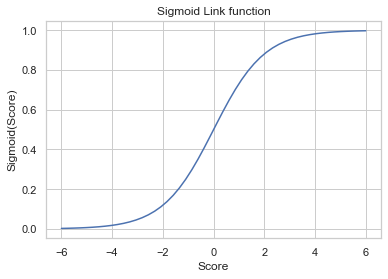

In [5]:
x = np.linspace(-6, 6)
y = sigmoid(x)

data = {'Score': x, 'Sigmoid(Score)': y}
ax = sns.lineplot(x='Score', y='Sigmoid(Score)', data=data)
ax.set(xlabel='Score', ylabel='Sigmoid(Score)')
ax.set(title='Sigmoid Link function');

#### Maximum Likelihood Quality Metric

- *How to evaluate the learned coefficients?*

    Model which returns the highest likelihood given the $ w_i ... w_d $


| Data Point | X[1] | X[2]  |  y  | Choose w to maximise                  |
|:----------:|:----:| :---: | :-: | :-----------------------------------: |
| x,y      | 2    | 1     | +1  | $ P(y = +1 | x, w) $   |
| x,y      | 0    | 2     | -1  | $ P(y = -1 | x, w) $   |
| x,y      | 6    | 7     | -1  | $ P(y = -1 | x, w) $   |
| x,y      | 19   | 1     | +1  | $ P(y = +1 | x, w) $  |

$ likelihood(w) = {\displaystyle \prod_{i=1}^N P(y_i | x_i, w)} $

<img src='../images/likelihood_example.jpg' alt='Maximum Likelihood Example' style="width: 600px;" align="left">

#### Gradient Ascent (TODO: Add some theory to this section)

- How to learn the coefficients?

*High Level Algorithm for Single data point*

- while not converged:

    - $ \displaystyle w ^ {t + 1} = w ^ {t}  + n {\displaystyle \frac{ \partial l}{\partial w}}$
    
For multiple data points, we will use d + 1 dimensional vector as

$ \displaystyle \nabla l (w) = \begin{vmatrix} {\displaystyle \frac{ \partial l}{\partial w_0}} \\ {\displaystyle \frac{ \partial l}{\partial w_1}} \\ ... \\ {\displaystyle \frac{ \partial l}{\partial w_d}} \end{vmatrix}$


In [7]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams["figure.figsize"] = 8, 8
# from mpl_toolkits.mplot3d import axes3d

# x1 = np.linspace(-6, 8, 32)
# x2 = np.linspace(-6, 8, 32)

# X1, X2 = np.meshgrid(x1, x2)
# Y = np.sqrt(np.square(X1) + np.square(X2))

# #fig = plt.figure(figsize=plt.figaspect(0.5))
# fig = plt.figure(figsize=plt.figaspect(0.5))

# # First Plot
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# surf = ax.plot_surface(X1, X2, Y * -1, cmap='jet')
# fig.colorbar(surf, shrink=0.5, aspect=10)

# # Second Plot
# ax = fig.add_subplot(1, 2, 2)

# cp = plt.contour(X1, X2, Y)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('Weight of #Loan')
# plt.ylabel('Weight of #Savings')
# plt.show()

**Derivative of Likelihood**

$ {\displaystyle \frac{ \partial (w)}{\partial w_j}} = \displaystyle \sum_{i=1}^N h_j(x_i) (1[y_i = +1] - P(y = +1 | x_i, w))$

where

- $1[y_i = +1]$ is 1 if $y_i$ = +1 or 0 if $y_i$ = -1

*Example*

- $ w_1 $ = 1
- n = 0.1

| X[1] | X[2]  |  y | $P(y_i)$ | Contribution to $ w_1 $ derivative |
|----| --- | ---- | :---------------------: | -------------------------- |
| 2    | 1     | +1  |         00.05         | ?   |
| 0    | 2     | -1  |          00.02       | ?   |
| 3    | 3     | -1  |      00.05        | ?   |

*Coefficients update rule during each iteration*

Let assume that  $h_j(x_i) = 1$ in $ {\displaystyle \frac{ \partial l(w)}{\partial w_j}} = \displaystyle \sum_{i=1}^N h_j(x_i) (1[y_i = +1] - P(y = +1 | x_i, w))$

- $P(y=+1|x_i, w) \approx 1$
    - if $y_i=+1$
        - $\Delta_i = 1 * (1 - 1) \approx 0$
        - Dont change anything as predection is correct
    - elif $y_i=-1$
        - $\Delta_i = 1 * (1 - 1) \approx 1$
        - decrease $w_j$ for next iteration so that $P(y=+1|x_i, w)$ also decreases
- $P(y=+1|x_i, w) \approx 0$
    - if $y_i=-1$
        - $\Delta_i = 1 * (0 - 0) \approx 0$
        - Dont change anything as predection is correct
    - elif $y_i=+1$
        - $\Delta_i = 1 * (0 - 1) \approx 1$
        - increase $w_j$ for next iteration so that $P(y=+1|x_i, w)$ also increase

#### Multiclass Classification: One v/s All
<img src='../images/one_vs_all_lr_classifier_example.png' alt='One v/s All Classifier Example' style="width: 600px;" align="left">

## Machine Learning Project Lifecycle: Second Iteration

- tf-idf
- Logistic Regression
- GridSearchCV
- precision, recall

### Problem Statement

Classify the Financial Consumer Complaints into different Product Categories given consumer complaint text.

**Product Categories**

- Credit reporting, repair, or other
- Debt collection
- Student loan
- Money transfer, virtual currency, or money service
- Bank account or service

### Training Data

[Kaggle: Consumer Complaint Database](https://www.kaggle.com/selener/consumer-complaint-database)

In [8]:
import pandas as pd

In [9]:
complaints_training_dataset = pd.read_csv('../datasets/consumer_complaints_training_dataset.csv')

In [10]:
complaints_training_dataset.head()

,Product,Complaint_text
0,"Credit reporting, repair, or other","My name is XXXX XXXX XXXX , not XXXX X..."
1,"Credit reporting, repair, or other",I was shocked when I reviewed my credit report...
2,"Credit reporting, repair, or other",Equifax misused of credit file. Disputing acco...
3,"Credit reporting, repair, or other",I am disturbed that you continue to list the v...
4,"Credit reporting, repair, or other",I went to multiple different credit report web...


In [11]:
complaints_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
Product           20000 non-null object
Complaint_text    20000 non-null object
dtypes: object(2)
memory usage: 312.6+ KB


**Q) What is the distribution of complaints for each product type?**

In [12]:
complaints_training_dataset.Product.unique()

array(['Credit reporting, repair, or other', 'Debt collection',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Bank account or service'], dtype=object)

In [13]:
complaints_training_dataset\
    .groupby('Product')\
    [['Complaint_text']]\
    .count()\
    .rename(columns={'Complaint_text': 'Count'})\
    .sort_values('Count', ascending=False)

,Count
Product,
Bank account or service,4000
"Credit reporting, repair, or other",4000
Debt collection,4000
"Money transfer, virtual currency, or money service",4000
Student loan,4000


**Q) Find out the Occurances of Duplicate Text messages if any?**

In [14]:
complaints_training_dataset['Complaint_text'].nunique()

19913

In [15]:
duplicate_complaints = complaints_training_dataset['Complaint_text']\
    .value_counts()\
    [complaints_training_dataset['Complaint_text'].value_counts() > 2].index

In [16]:
len(duplicate_complaints)

9

### Preprocessing + Feature Engineering

- tf-idf

In [169]:
import datetime
start_time = datetime.datetime.now()

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

RANDOM_STATE = 19

In [171]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
    complaints_training_dataset['Complaint_text'],
    complaints_training_dataset['Product'],
    test_size=.2,
    stratify=complaints_training_dataset['Product'],
    random_state=RANDOM_STATE)

In [173]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000,), (4000,), (16000,), (4000,))

In [174]:
X_train_tfidf_vectorizer = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf_vectorizer = tfidf_vectorizer.transform(X_test)

In [175]:
len(tfidf_vectorizer.get_feature_names())

5000

In [176]:
tfidf_vectorizer.get_feature_names()[:10]

['00', '000', '10', '100', '1000', '10000', '100000', '1005', '11', '110']

In [177]:
tfidf_vectorizer.vocabulary_

{'xxxx': 4976,
 'account': 322,
 'listed': 2727,
 'credit': 1279,
 'report': 3828,
 'experian': 1842,
 'paid': 3234,
 'closed': 1021,
 '2007': 63,
 'like': 2712,
 'removed': 3795,
 'years': 4986,
 'employer': 1698,
 'submitted': 4351,
 'incorrect': 2429,
 'information': 2457,
 'hsa': 2338,
 'bank': 688,
 'subsidiary': 4359,
 'webster': 4876,
 'money': 2984,
 'deducted': 1378,
 'paycheck': 3273,
 '15': 28,
 'days': 1329,
 'hired': 2289,
 'refusing': 3715,
 'release': 3764,
 'funds': 2094,
 'corrected': 1225,
 'requested': 3845,
 'verifying': 4792,
 'identity': 2366,
 'social': 4198,
 'security': 4056,
 'number': 3097,
 'began': 719,
 'disputing': 1563,
 'items': 2575,
 'bureaus': 840,
 'xx': 4975,
 'sent': 4081,
 'follow': 2015,
 'letters': 2687,
 'believe': 728,
 'public': 3548,
 'records': 3673,
 'reporting': 3830,
 'accurately': 339,
 'compliance': 1097,
 'fcra': 1926,
 'fdcpa': 1927,
 'received': 3649,
 'didnt': 1485,
 'say': 4007,
 'company': 1077,
 'voicemail': 4823,
 'left': 2671

In [178]:
X_train_tfidf_vectorizer.shape, X_test_tfidf_vectorizer.shape

((16000, 5000), (4000, 5000))

### Machine Learning Algorithm: Logistic Regression

#### Using Sklearn Implementation for Student Loan Class Prediction

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [290]:
sklearn_binary_classifier = LogisticRegression(penalty='none',
                                                        max_iter=101,
                                                        random_state=RANDOM_STATE)

In [291]:
sklearn_binary_classifier.fit(X_train_tfidf_vectorizer, y_train == 'Student loan')

/Users/pardeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=101,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=19, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [292]:
sklearn_binary_classifier_predictions = sklearn_binary_classifier.predict(X_test_tfidf_vectorizer)

In [293]:
sklearn_binary_classifier_score = accuracy_score(y_test == 'Student loan', sklearn_binary_classifier_predictions)
sklearn_binary_classifier_score

0.955

#### Custom Implementation for Student Loan Class Prediction

**Estimating Conditional Probability using Link Function**

$ P(y_i = +1 | \mathbf{x}_i,\mathbf{w}) = \frac{1}{1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))} $

In [294]:
def sigmoid(scores):
    return 1.0 / (1 + np.exp(-scores))

def predict_probability(feature_matrix, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    predictions = sigmoid(scores)
    return predictions

In [295]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])

correct_scores      = np.array( [ 1.*1. + 2.*3. + 3.*(-1.),          1.*1. + (-1.)*3. + (-1.)*(-1.) ] )
correct_predictions = np.array( [ 1./(1+np.exp(-correct_scores[0])), 1./(1+np.exp(-correct_scores[1])) ] )

print('The following outputs must match ')
print('------------------------------------------------')
print('correct_predictions           =', correct_predictions)
print('output of predict_probability =', predict_probability(dummy_feature_matrix, dummy_coefficients))

The following outputs must match 
------------------------------------------------
correct_predictions           = [0.98201379 0.26894142]
output of predict_probability = [0.98201379 0.26894142]


**Compute derivative of log likelihood with respect to a single coefficient**

$
\displaystyle \frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right)
$

We will now write a function that computes the derivative of log likelihood with respect to a single coefficient $w_j$. The function accepts two arguments:
* `errors` vector containing $\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})$ for all $i$.
* `feature` vector containing $h_j(\mathbf{x}_i)$  for all $i$.

In [296]:
def feature_derivative(errors, feature):
    derivative = np.dot(errors, feature)
    return derivative

**Compute log likelihood which is given by**

$ \ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (\mathbf{1}[y_i = +1] - 1)\mathbf{w}^T h(\mathbf{x}_i) - \ln\left(1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))\right) \Big) $

In [297]:
def compute_log_likelihood(feature_matrix, target_labels, target_label, coefficients):
    indicator = (target_labels == target_label)
    scores = np.dot(feature_matrix, coefficients)
    likelihood = np.sum((indicator - 1) * scores - np.log(1 + np.exp(-scores)))
    return likelihood

In [298]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])
dummy_sentiment = np.array([-1, 1])

correct_indicators = np.array([ -1==+1, 1==+1])
correct_scores      = np.array( [ 1.*1. + 2.*3. + 3.*(-1.),  1.*1. + (-1.)*3. + (-1.)*(-1.) ] )
correct_first_term  = np.array( [ (correct_indicators[0]-1)*correct_scores[0],
                                 (correct_indicators[1]-1)*correct_scores[1] ] )
correct_second_term = np.array( [ np.log(1. + np.exp(-correct_scores[0])), 
                                 np.log(1. + np.exp(-correct_scores[1])) ] )

correct_ll          =      sum( [ correct_first_term[0]-correct_second_term[0],
                                 correct_first_term[1]-correct_second_term[1] ] ) 

print('The following outputs must match ')
print('------------------------------------------------')
print('correct_log_likelihood           =', correct_ll)
print('output of compute_log_likelihood =', compute_log_likelihood(dummy_feature_matrix,
                                                                   dummy_sentiment,
                                                                   1,
                                                                   dummy_coefficients))

The following outputs must match 
------------------------------------------------
correct_log_likelihood           = -5.331411615436032
output of compute_log_likelihood = -5.331411615436032


**Train Binary Logistic Regression Classifier model using Gradient Ascent**

In [299]:
def train_binary_lr_classifier(
        feature_matrix, target_labels, target_label,
        initial_coefficients, step_size, max_iterations):
    coefficients = np.array(initial_coefficients)
    for iteration in range(max_iterations):
        predictions = predict_probability(feature_matrix, coefficients)
        
        indicator = (target_labels == target_label)
        
        errors = indicator - predictions
        
        for j in range(len(coefficients)):
            derivative = feature_derivative(errors, feature_matrix[:, j])
            coefficients[j] += step_size * derivative
            
        if (iteration <= 100 and iteration % 10 == 0)\
            or (iteration <= 1000 and iteration % 100 == 0)\
            or (iteration <= 10000 and iteration % 1000 == 0)\
            or iteration % 10000 == 0:
            lp = compute_log_likelihood(feature_matrix, target_labels,
                                        target_label, coefficients)
            print('----------------------------------')
            print(f'Iteration: {iteration} -> Likelihood value: {lp} for {target_label} classifier.')
            predicted_probabilities = predict_probability(feature_matrix, coefficients)
            predicted_classes = predicted_probabilities > .5
            correct_predictions = predicted_classes == (target_labels == target_label)
            print(f'Minimum Probability:{predictions.min()},',
                  f'Maximum Probability:{predictions.max()},',
                  f'Current Accuracy: {correct_predictions.sum() / len(target_labels)}')
    return coefficients

In [318]:
# Hyper Paramters
step_size, max_iterations =1e-3, 101

# Target Variables
target_labels, target_label = y_train, 'Student loan'

# Feature Matrix & Initial Coefficients
#constant_feature = np.ones((X_train_tfidf_vectorizer.shape[0], 1))
#features_matrix = np.hstack((constant_feature, X_train_tfidf_vectorizer.toarray()))
features_matrix = X_train_tfidf_vectorizer.toarray()
initial_coefficients = np.zeros(X_train_tfidf_vectorizer.shape[1])

print(X_train_tfidf_vectorizer.shape, initial_coefficients.shape)
custom_binary_classifier_coeffs = train_binary_lr_classifier(
    features_matrix,
    target_labels,
    target_label,
    initial_coefficients,
    step_size,
    max_iterations)

(16000, 5000) (5000,)
----------------------------------
Iteration: 0 -> Likelihood value: -9264.973598987097 for Student loan classifier.
Minimum Probability:0.5, Maximum Probability:0.5, Current Accuracy: 0.8098125
----------------------------------
Iteration: 10 -> Likelihood value: -5684.652745709447 for Student loan classifier.
Minimum Probability:0.03220807632465235, Maximum Probability:0.8248226069329134, Current Accuracy: 0.8836875
----------------------------------
Iteration: 20 -> Likelihood value: -4527.1525909665925 for Student loan classifier.
Minimum Probability:0.015522900093332435, Maximum Probability:0.9419128476869763, Current Accuracy: 0.92
----------------------------------
Iteration: 30 -> Likelihood value: -3886.9630777387206 for Student loan classifier.
Minimum Probability:0.009396161172296824, Maximum Probability:0.9771028090740713, Current Accuracy: 0.935
----------------------------------
Iteration: 40 -> Likelihood value: -3481.9147446806173 for Student loan 

In [319]:
custom_binary_classifier_predictions = predict_probability(features_matrix,
                                                           custom_binary_classifier_coeffs) > .5
custom_binary_classifier_score = accuracy_score(target_labels == 'Student loan',
                                            custom_binary_classifier_predictions)
custom_binary_classifier_score

0.9549375

In [320]:
sklearn_binary_classifier_score, custom_binary_classifier_score

(0.955, 0.9549375)

**Common features in top n feature**

In [386]:
def print_top_n(vectorizer, coeffs, class_labels, n=10):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    if coeffs.shape[0] > 1:
        for i, class_label in enumerate(class_labels):
            top = np.argsort(coeffs[i])[::-1][:n]
            print("\n==> %s:" %(class_label))
            print("    * %s" % (", ".join(feature_names[j] for j in top)))
    else:
        top = np.argsort(coeffs[0])[::-1][:n]
        for feature_index in top:
            print(feature_names[feature_index], coeffs[0, feature_index])
        return [feature_names[j] for j in top]

In [385]:
n = 10
print(f'Sklearn top {n} features')
sklearn_top_features = print_top_n(
    tfidf_vectorizer,
    sklearn_binary_classifier.coef_,
    ['Student Loan'],
    n=n)

print('----------------------------------------')
print(f'Custom Imp top {n} features')
custom_imp_top_features = print_top_n(
    tfidf_vectorizer,
    np.array([custom_binary_classifier_coeffs]),
    ['Student Loan'],
    n=n)

print('----------------------------------------')
common_features = set(sklearn_top_features).intersection(set(custom_imp_top_features))
print(f'Common Features are {common_features}')
print(f'Common features count is {len(common_features)}')

Sklearn top 10 features
navient 295.0307534420733
fedloan 215.803709265229
repayment 196.0183337773061
classes 180.32893117859632
deferment 178.0680256064273
mohela 166.54542268573329
consolidated 161.91267072372142
originated 142.16506470435417
unverifiable 137.65606583407393
paperwork 134.85421622491603
----------------------------------------
Custom Imp top 10 features
loan 6.51029232301947
loans 5.7841808005092865
navient 5.766705675261361
student 3.8980105395957105
payments 3.663740806896705
payment 3.0073421460042047
school 2.4557757105588878
repayment 2.121930144127936
forbearance 2.024210843243374
income 1.726670202917134
----------------------------------------
Common Features are {'navient', 'repayment'}
Common features count is 2


### Model Evaluation

In [212]:
from sklearn.model_selection import cross_val_score

In [217]:
cv_scores = cross_val_score(LogisticRegression(penalty='none', max_iter=1000, random_state=RANDOM_STATE),
                            X_train_tfidf_vectorizer,
                            y_train,
                            cv=5)

/Users/pardeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [218]:
print(cv_scores.mean())
print(cv_scores)

0.8190625
[0.8140625 0.83      0.806875  0.82375   0.820625 ]


### Quality Metrics

In [41]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix)

import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
predictions = lr.predict(X_test_tfidf_vectorizer)

In [43]:
accuracy_score(y_test, predictions)

0.82425

In [44]:
conf_matrix = confusion_matrix(y_test, predictions, labels=y_test.unique())
conf_matrix

array([[660,  32,  10,  80,  18],
       [ 32, 634,  24,   5, 105],
       [ 12,  38, 703,  10,  37],
       [ 94,  21,   1, 676,   8],
       [ 20, 120,  25,  11, 624]])

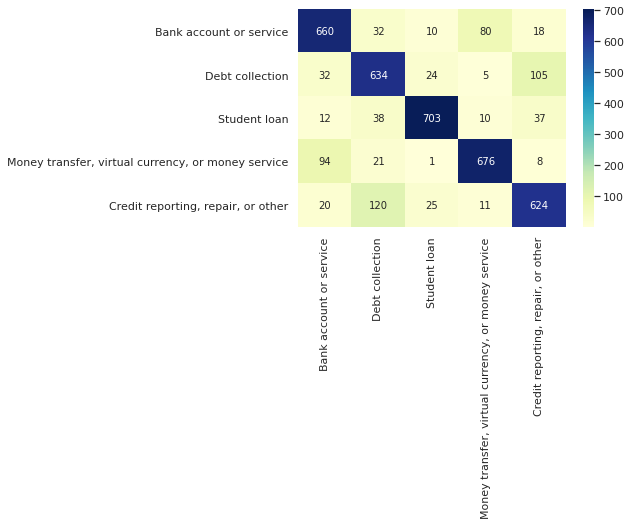

In [45]:
sns.heatmap(conf_matrix,
            cmap='YlGnBu',
            annot=True,
            fmt="d",
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())

### Model Evaluation on Test Dataset

- Note: Retrain the model using full training dataset.

## Homework

## Resources